In [50]:
import seaborn as sns
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")


---
## Init wandb

In [2]:
api = wandb.Api()

In [3]:
entity, project= "ece517", "lunar-lander"
runs = api.runs(f'{entity}/{project}')

In [87]:
summary_list, config_list, name_list = [], [], []
run_data_df_list = []

for run in runs:
    group = run.group
    summary_list.append(run.summary._json_dict)

    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})
    run_data_df = run.history()
    run_data_df['group'] = group
    for k,v in config_list[-1].items():
        if type(v) != dict:
            run_data_df[k] = v
    run_data_df_list.append(run_data_df)

    name_list.append(run.name)


In [96]:
runs_df = pd.concat(run_data_df_list)
runs_df = runs_df.replace({
    'group': {
        'ppo_ex': 'PPO',
        'ppo_1': 'PPO-Shared',

    }
})
runs_df['model'] = runs_df['group']
runs_df = runs_df.drop(columns=['group'])

In [97]:
runs_df

,trainer/global_step,avg_ep_len,avg_reward,_step,loss_actor,_runtime,loss_critic,epoch,avg_ep_reward,_timestamp,...,gamma,lr_actor,lr_critic,batch_size,clip_ratio,hidden_size,nb_optim_iters,max_episode_len,steps_per_epoch,model
0,1,44.369564,-1.117493,0,-0.000218,6.978245,13993.531744,0,-99.433436,1.670862e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,4,200,2048,PPO-Shared
1,3,92.345757,-2.175578,1,-0.000393,10.159163,16079.698637,1,-201.771888,1.670862e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,4,200,2048,PPO-Shared
2,5,100.134087,-1.959693,2,-0.000726,13.351315,12176.592699,2,-194.031123,1.670862e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,4,200,2048,PPO-Shared
3,7,100.515015,-1.784707,3,-0.000570,16.637685,9731.512911,3,-177.555095,1.670862e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,4,200,2048,PPO-Shared
4,9,92.791946,-1.823236,4,0.000151,19.767850,10448.335241,4,-169.381491,1.670862e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,4,200,2048,PPO-Shared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,291,442.875000,0.115502,145,-0.000041,304.327494,774.834871,145,37.271426,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
146,293,478.375000,0.081671,146,-0.000406,307.662335,671.954563,146,31.372478,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
147,295,465.875000,0.037825,147,-0.000659,311.072345,776.102663,147,16.147491,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
148,297,471.000000,0.018673,148,-0.002270,314.457304,187.171633,148,8.026029,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO


---
# Plots

In [98]:
def plot_data(var, title=None):
    plot = sns.lineplot(x="epoch", y=var,
                        hue="model",
                        data=runs_df)
    if title is not None:
        plot.set(title=title)
    plt.tight_layout()
    plt.savefig(f'{project}-{var}.png')

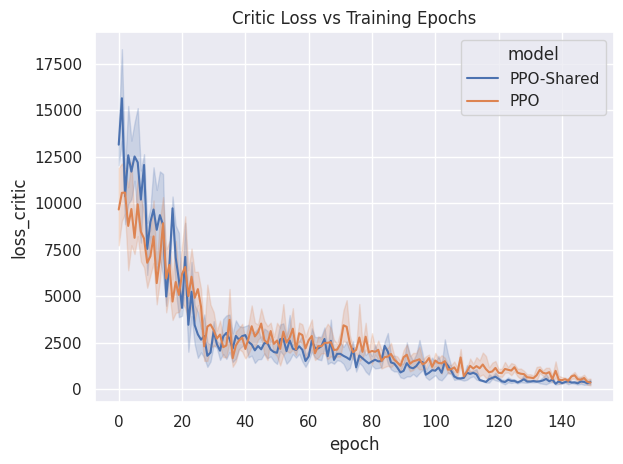

In [99]:
plot_data('loss_critic', title="Critic Loss vs Training Epochs")


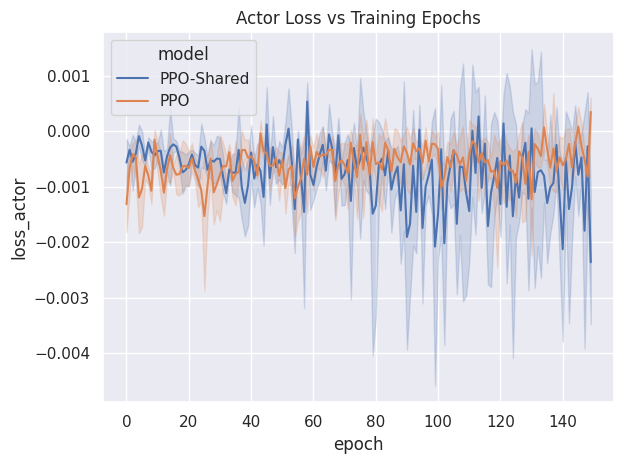

In [100]:
plot_data('loss_actor', title="Actor Loss vs Training Epochs")


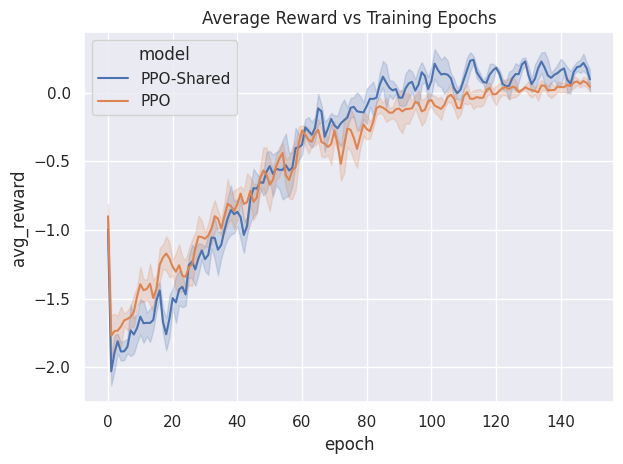

In [101]:
plot_data('avg_reward', title="Average Reward vs Training Epochs")


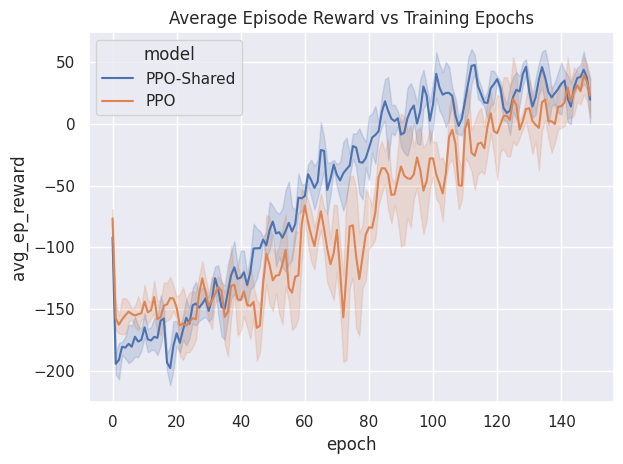

In [102]:
plot_data('avg_ep_reward', title="Average Episode Reward vs Training Epochs")


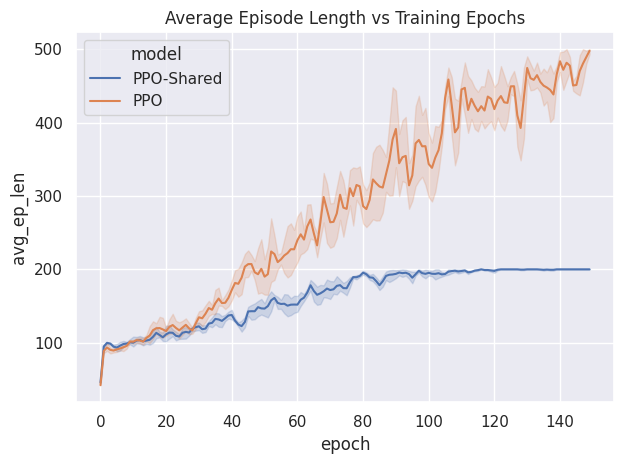

In [103]:
plot_data('avg_ep_len', title="Average Episode Length vs Training Epochs")
